# Statistical Tests

## Author(s), contact(s), and dates:
- Author: Nan Normann Jakobsen
- Email:  nnj@chem.ku.dk
- Date:   18th of January 2023 (latest update)

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from iminuit import Minuit 
import sys
sys.path.append('../External_Functions')
from ExternalFunctions import nice_string_output, add_text_to_ax 
from scipy import stats
from sympy import *

## Problem 4.1

In [3]:
df = pd.read_csv('data_LargestPopulation.csv')
Year, PopIndia, PopChina = df.values.T

### 4.1.1

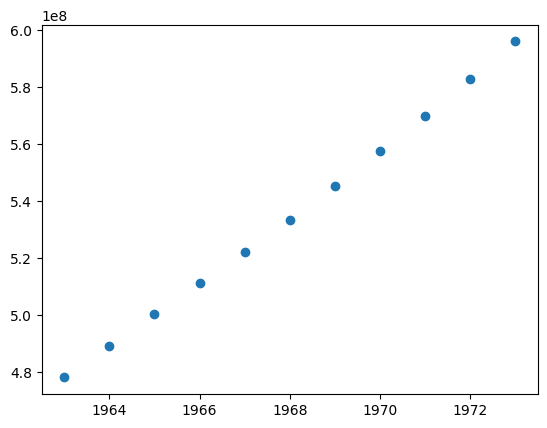

In [4]:
plt.scatter(Year[3:14], PopIndia[3:14])

In [5]:
Minuit.print_level = 0

y = PopIndia[3:14]
ey = np.zeros_like(y) + 1000
x = Year[3:14]

def fit_func(x, a, b):
    return a * x + b

def chi2_owncalc(a, b) :
    y_fit = fit_func(x, a, b)
    chi2 = np.sum(((y - y_fit) / ey)**2)
    return chi2
chi2_owncalc.errordef = 1.0

# Here we let Minuit know, what to minimise, how, and with what starting parameters:   
minuit = Minuit(chi2_owncalc, a = 10**(8), b = 10**(8)) # initial guess

# Perform the actual fit:
minuit.migrad()

Nvar = 2                    # Number of variables
Ndof_fit = len(y) - Nvar    # Number of degrees of freedom = Number of data points - Number of variables

# Get the minimal value obtained for the quantity to be minimised (here the Chi2)
Chi2_fit = minuit.fval                          # The chi2 value
Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_fit)    # The chi2 probability given N degrees of freedom

print(Chi2_fit)
print(Prob_fit)

17771510.84172474
0.0


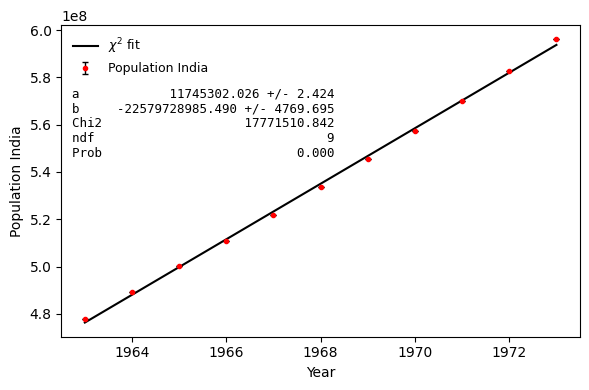

In [6]:
fig, ax = plt.subplots(figsize = (6, 4))

x_plot = np.linspace(min(x), max(x), 1000)

ax.plot(x_plot, fit_func(x_plot, *minuit.values[:]), '-k', zorder = -10, label = '$\chi^{2}$ fit')     # Note how we can "smartly" input the fit values!
ax.errorbar(x, y, ey, fmt = ".", color='r', ecolor='k', elinewidth=1, capsize=2, capthick=1, label = 'Population India')
ax.legend(frameon = False, fontsize = 9)

d = {'a':   [minuit.values[0], minuit.errors[0]],
     'b':   [minuit.values[1], minuit.errors[1]],
     'Chi2':     Chi2_fit,
     'ndf':      Ndof_fit,
     'Prob':     Prob_fit,
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.8, text, ax, fontsize=9)

ax.set(xlabel = 'Year', ylabel = 'Population India')

fig.tight_layout()
fig.savefig('PopIndia_fit1.png', dpi = 150)

In [7]:
y = PopIndia[3:14]
ey = np.ones_like(PopIndia[3:14]) * (fit_func(x, *minuit.values[:]) - PopIndia[3:14]).std(ddof = 1) # Assuming gaussian errors
print('Estimated uncertainty:', (fit_func(x, *minuit.values[:]) - PopIndia[3:14]).std(ddof = 1))
x = Year[3:14]

def fit_func(x, a, b):
    return a * x + b

def chi2_owncalc(a, b) :
    y_fit = fit_func(x, a, b)
    chi2 = np.sum(((y - y_fit) / ey)**2)
    return chi2
chi2_owncalc.errordef = 1.0

# Here we let Minuit know, what to minimise, how, and with what starting parameters:   
minuit = Minuit(chi2_owncalc, a = 10**(8), b = 10**(8)) # initial guess

# Perform the actual fit:
minuit.migrad()

Nvar = 2                    # Number of variables
Ndof_fit = len(y) - Nvar    # Number of degrees of freedom = Number of data points - Number of variables

# Get the minimal value obtained for the quantity to be minimised (here the Chi2)
Chi2_fit = minuit.fval                          # The chi2 value
Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_fit)    # The chi2 probability given N degrees of freedom

print(Chi2_fit)
print(Prob_fit)

Estimated uncertainty: 1333098.3025165375
10.000000000029535
0.35048521232097046


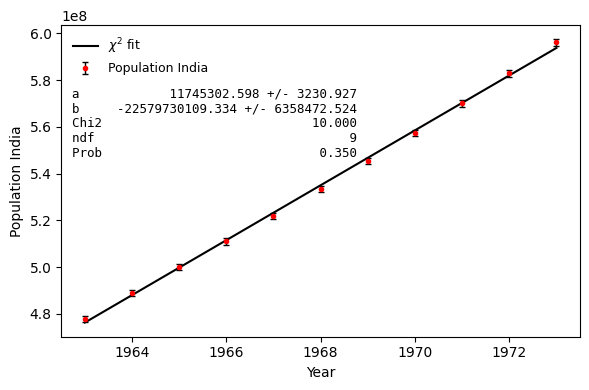

In [8]:
fig, ax = plt.subplots(figsize = (6, 4))

x_plot = np.linspace(min(x), max(x), 1000)

ax.plot(x_plot, fit_func(x_plot, *minuit.values[:]), '-k', zorder = -10, label = '$\chi^{2}$ fit')     # Note how we can "smartly" input the fit values!
ax.errorbar(x, y, ey, fmt = ".", color='r', ecolor='k', elinewidth=1, capsize=2, capthick=1, label = 'Population India')
ax.legend(frameon = False, fontsize = 9)

d = {'a':   [minuit.values[0], minuit.errors[0]],
     'b':   [minuit.values[1], minuit.errors[1]],
     'Chi2':     Chi2_fit,
     'ndf':      Ndof_fit,
     'Prob':     Prob_fit,
    }

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.8, text, ax, fontsize=9)

ax.set(xlabel = 'Year', ylabel = 'Population India')

fig.tight_layout()
fig.savefig('PopIndia_fit2.png', dpi = 150)

### 4.1.2

In [9]:
sigma_pop = np.zeros_like(len(PopChina)) + 1000000

In [10]:
y_India = PopIndia
y_China = PopChina
ey = sigma_pop
x = Year

def fit_func(x, a, b):
    return a * x + b

def chi2_India(a, b) :
    y_fit = fit_func(x, a, b)
    chi2 = np.sum(((y_India - y_fit) / ey)**2)
    return chi2
chi2_India.errordef = 1.0

def chi2_China(a, b) :
    y_fit = fit_func(x, a, b)
    chi2 = np.sum(((y_China - y_fit) / ey)**2)
    return chi2
chi2_China.errordef = 1.0

# Here we let Minuit know, what to minimise, how, and with what starting parameters:   
minuit_India = Minuit(chi2_India, a = 10**8, b = 10**8) # initial guess
minuit_China = Minuit(chi2_China, a = 10**8, b = 10**8) # initial guess

# Perform the actual fit:
minuit_India.migrad()
minuit_China.migrad()

Nvar = 2                    # Number of variables
Ndof_fit = len(y) - Nvar    # Number of degrees of freedom = Number of data points - Number of variables

# Get the minimal value obtained for the quantity to be minimised (here the Chi2)
Chi2_India = minuit_India.fval                          # The chi2 value
Prob_India = stats.chi2.sf(Chi2_India, Ndof_fit)    # The chi2 probability given N degrees of freedom
Chi2_China = minuit_China.fval                          # The chi2 value
Prob_China = stats.chi2.sf(Chi2_China, Ndof_fit)    # The chi2 probability given N degrees of freedom

print('Chi2 India:', Chi2_India)
print('Probability India:', Prob_India)
print('Chi2 China:', Chi2_China)
print('Probability China:', Prob_China)

Chi2 India: 26271.679308877992
Probability India: 0.0
Chi2 China: 88802.58370343506
Probability China: 0.0


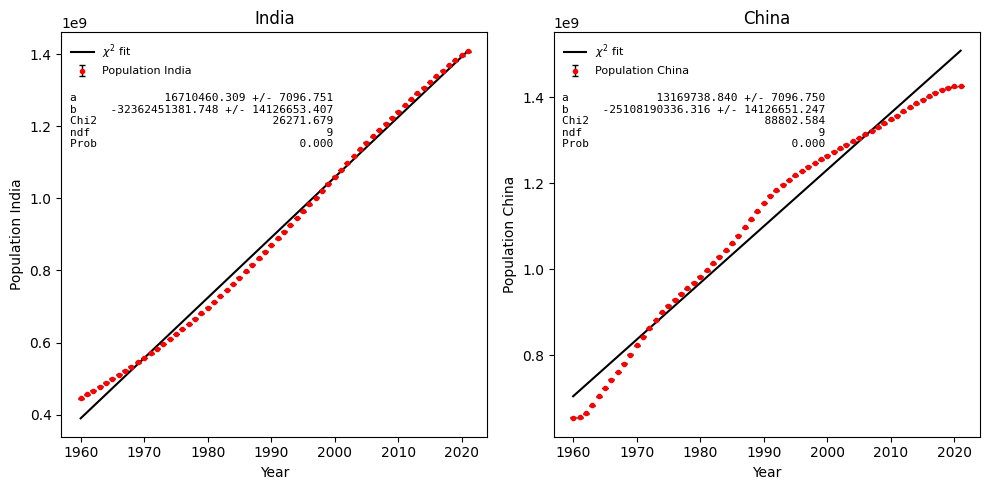

In [11]:
fig, ax = plt.subplots(1,2, figsize = (10, 5))

x_plot = np.linspace(min(x), max(x), 1000)

ax[0].plot(x_plot, fit_func(x_plot, *minuit_India.values[:]), '-k', zorder = -10, label = '$\chi^{2}$ fit')     # Note how we can "smartly" input the fit values!
ax[0].errorbar(x, y_India, ey, fmt = ".", color='r', ecolor='k', elinewidth=1, capsize=2, capthick=1, label = 'Population India')
ax[0].legend(frameon = False, fontsize = 8)

ax[1].plot(x_plot, fit_func(x_plot, *minuit_China.values[:]), '-k', zorder = -10, label = '$\chi^{2}$ fit')     # Note how we can "smartly" input the fit values!
ax[1].errorbar(x, y_China, ey, fmt = ".", color='r', ecolor='k', elinewidth=1, capsize=2, capthick=1, label = 'Population China')
ax[1].legend(frameon = False, fontsize = 8)

d_India = {'a':   [minuit_India.values[0], minuit_India.errors[0]],
     'b':   [minuit_India.values[1], minuit_India.errors[1]],
     'Chi2':     Chi2_India,
     'ndf':      Ndof_fit,
     'Prob':     Prob_India,
    }

d_China = {'a':   [minuit_China.values[0], minuit_China.errors[0]],
     'b':   [minuit_China.values[1], minuit_China.errors[1]],
     'Chi2':     Chi2_China,
     'ndf':      Ndof_fit,
     'Prob':     Prob_China,
    }

text = nice_string_output(d_India, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.85, text, ax[0], fontsize=8)

text = nice_string_output(d_China, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.85, text, ax[1], fontsize=8)

ax[0].set(xlabel = 'Year', ylabel = 'Population India', title = 'India')
ax[1].set(xlabel = 'Year', ylabel = 'Population China', title = 'China')

fig.tight_layout()
fig.savefig('Population_fit1.png', dpi = 200)

In [12]:
years_after_2021 = np.arange(2022, 2100, 1)

for year in years_after_2021:
    pop_I = fit_func(year, *minuit_India.values)
    pop_C = fit_func(year, *minuit_China.values)
    if pop_I > pop_C:
        print(year)
        print('Population India:', pop_I)
        print('Population China:', pop_C)
        break

2049
Population India: 1877281791.46566
Population China: 1876604547.314743


## Problem 4.2

In [18]:
p_side_effect = 14/48
n_patients = 48

sigma_binomal = np.sqrt(n_patients * p_side_effect * (1 - p_side_effect))
print(sigma_binomal)

3.1490739379485304


In [19]:
# Normal approximation
# one tailed test with 5% significance
n_side_effects = 14 + 1.64 * sigma_binomal
print('Number of side effects needed to show that the drug has a side effect:', n_side_effects)

Number of side effects needed to show that the drug has a side effect: 19.16448125823559


## Problem 4.3

In [15]:
battery_life_A = np.array([28.9, 26.4, 22.8, 27.3, 25.9])
battery_life_B = np.array([22.4, 21.3, 25.1, 24.8, 22.5])

mean_A, std_A = battery_life_A.mean(), battery_life_A.std(ddof=1)
mean_B, std_B = battery_life_B.mean(), battery_life_B.std(ddof=1)

print('Mean battery lifetime phone A:', mean_A, '+-', std_A)
print('Mean battery lifetime phone B:', mean_B, '+-', std_B)

pooled_est = np.sqrt(1 / np.sum([1 / std_A**2, 1 / std_B**2]))
print('Pooled estimate:', pooled_est)

ndof = len(battery_life_A) + len(battery_life_B) - 2
t = (mean_A - mean_B) / (pooled_est * np.sqrt((1 / len(battery_life_B)) + (1 / len(battery_life_B))))
print('Students t with ndof', ndof, 'and t', t) # Outside 95% confidence level for 2 tailed Student's t distrubition, which is t = 2.306 for 8 degress of freedom

Mean battery lifetime phone A: 26.259999999999998 +- 2.2456624857711804
Mean battery lifetime phone B: 23.220000000000002 +- 1.6513630733427467
Pooled estimate: 1.3303825617534835
Students t with ndof 8 and t 3.6129923689924253
